In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Definition

In general, for two distributions $\mathbb{P}$ and $\mathbb{Q}$, KL divergence is defined as

\begin{align*} 
d(\mathbb{P}, \mathbb{Q}) = \int_{x \in \mathcal{X}} \mathbb{P}(x) \ln \frac{\mathbb{P}(x)}{\mathbb{Q}(x)}
\end{align*}

For two Bernoulli distributions with mean $p, q \in (0, 1)$, respectively,

\begin{align*} 
d(p, q) = p \ln \frac{p}{q} + (1 - p) \ln \frac{(1 - p)}{(1 - q)}
\end{align*}

## Prove $d(p, q)$ is convex with fixed $p$ or $q$

With fixed $q$,

\begin{align*}
\frac{\partial d(p, q)}{\partial p}
&= \ln \frac{p}{q} + p \frac{q}{p} \cdot \frac{1}{q} - \ln \frac{1 - p}{1 - q} - (1 - p) \frac{1 - q}{1 - p} \cdot \frac{1}{1 - q} \\
&= \ln \frac{p}{q} + 1 - \ln \frac{1 - p}{1 - q} - 1 \\
&= \ln \frac{p}{q} - \ln \frac{1 - p}{1 - q} \\
\frac{\partial^2 d(p, q)}{\partial p^2}
&= \frac{q}{p} + \frac{1 - q}{1 - p} \\
&> 0
\end{align*}

so $d(\cdot, q)$ is convex.

With fixed $p$, 

\begin{align*}
d(p, q)
&= p \ln p - p \ln q + (1 - p) \ln (1 - p) - (1 - p) \ln (1 - q) \\
\frac{\partial d(p, q)}{\partial q}
&= - \frac{p}{q} + \frac{1 - p}{1 - q} \\
\frac{\partial^2 d(p, q)}{\partial q^2}
&= \frac{p}{q^2} + \frac{1 - p}{(1 - q)^2} \\
&> 0
\end{align*}

so $d(p, \cdot)$ is convex.

## Prove Pinsker's inequality $d(p, q) \ge 2 (p - q)^2$,

Let $q = p + x$, we'll prove by showing $d(p, p + x) \ge 2x^2$. Consider the function $g(x) = d(p, p+x) - 2x^2$, take its derivative and set it to zero,

\begin{align*}
\frac{\partial g(x)}{\partial x}
= - \frac{p}{p + x} + \frac{1 - p}{1 - p - x} - 4x
&= 0 \\
\end{align*}

Then we obtain two solutions:

\begin{align*}
x_1 &= \frac{1}{2} - p \\
x_2 &= 0
\end{align*}

Inspect their corresponding second order deriviative:

\begin{align*}
\frac{\partial^2 g(x)}{\partial x^2}
= \frac{p}{(p + x)^2} + \frac{1 - p}{(1 - p - x)^2} - 4
&= 0 \\
\frac{\partial^2 g(x)}{\partial x^2}\Big|_{x=\frac{1}{2} - p}
&= 0 \\
\frac{\partial^2 g(x)}{\partial x^2}|_{x=0}
&= \frac{(2 p - 1)^2}{p(1 - p)} \ge 0
\end{align*}

when $p = 1/2$, the two solutions converge, and g(x) is a convex function.

when $p \neq 1/2$, the curve around $x=0$ is still convex, but we'll show that around $x = \frac{1}{2} - p$ is an inflection point.

For a small $\epsilon > 0$, we can obtain the second order derivatives around $x = \frac{1}{2} - p$,

\begin{align*}
\frac{\partial^2 g(x)}{\partial x^2}\Big|_{x=\frac{1}{2} - p + \frac{\epsilon}{2}}
&= 4 \left[ \frac{(1 + \epsilon)^2 - 4p\epsilon}{(1 + \epsilon)^2 (1 - \epsilon)^2} - 1 \right ] = L \\
\frac{\partial^2 g(x)}{\partial x^2}\Big|_{x=\frac{1}{2} - p - \frac{\epsilon}{2}}
&= 4 \left[ \frac{(1 - \epsilon)^2 + 4p\epsilon}{(1 + \epsilon)^2 (1 - \epsilon)^2} - 1 \right ] = R \\
\end{align*}

Note, we divided $\epsilon$ by $2$ just for mathematical convenience. Now, we'll show $L$ and $R$ are of opposite signs by proving $\lim_{\epsilon \rightarrow 0} \frac{L}{R} = - 1 < 0$.

\begin{align*}
\frac{L}{R}
&= \frac{(1 + \epsilon)^2 - 4p\epsilon - (1 + \epsilon)^2 (1 - \epsilon)^2}{(1 - \epsilon)^2 + 4p\epsilon - (1 + \epsilon)^2 (1 - \epsilon)^2} = \frac{a(\epsilon)}{b(\epsilon)}
\end{align*}

where $a$ and $b$ are the numerator and denominator, respectively.

To find the limit, we apply L'Hôpital's rule, 

\begin{align*}
\lim_{\epsilon \rightarrow 0} \frac{a(\epsilon)}{b(\epsilon)}
&= \lim_{\epsilon \rightarrow 0} \frac{a'(\epsilon)}{b'(\epsilon)} \\
&= \lim_{\epsilon \rightarrow 0} \frac{2 + 2 \epsilon - 4p - 4 \epsilon^3 + 4 \epsilon}{-2 + \epsilon + 4p - 4 \epsilon^3 + 4 \epsilon} \\
&= \frac{2 - 4p}{4p - 2} \\
&= -1
\end{align*}

Therefore, $x = 0$ is the only minimizer,

\begin{align*}
d(p, p+x) - 2x^2
&\ge 0 \\
d(p, p+x)
&\ge 2x^2 \\
\end{align*}

which is equivalent to the Pinsker's inequality.

Below, we plotted $g(x)$ for $p \in \{0.3, 0.7\}$ to illustrate the minimum and inflection points.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def g(x, p):
    return p * np.log(p / (p + x)) + (1 - p) * np.log((1 - p) / (1 - p - x)) - 2 * x ** 2


def derivative(x, p):
    return - p /(p + x) + (1 - p) / (1 - p - x) - 4 * x

def derivative_2nd(x, p):
    return p / ((p + x) ** 2) + (1 - p) / ((1 - p - x) ** 2) - 4

In [4]:
select_p_vals = [0.3, 0.7]

/tmp/ipykernel_1305552/544009666.py:2: RuntimeWarning: divide by zero encountered in divide
  return p * np.log(p / (p + x)) + (1 - p) * np.log((1 - p) / (1 - p - x)) - 2 * x ** 2
/tmp/ipykernel_1305552/544009666.py:6: RuntimeWarning: divide by zero encountered in divide
  return - p /(p + x) + (1 - p) / (1 - p - x) - 4 * x
/tmp/ipykernel_1305552/544009666.py:9: RuntimeWarning: divide by zero encountered in divide
  return p / ((p + x) ** 2) + (1 - p) / ((1 - p - x) ** 2) - 4


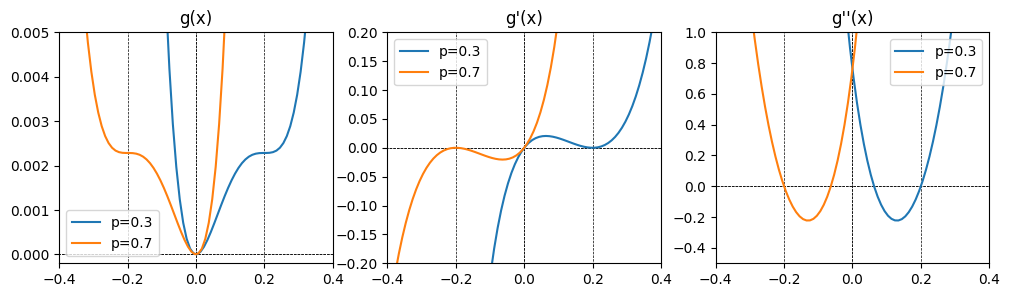

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
ax0, ax1, ax2 = axes.ravel()


# Highlight the locations of minimum and inflection points.
for ax in [ax0, ax1, ax2]:
    for p in select_p_vals:
        ax.plot(
            [0.5 - p, 0.5 - p],
            [-100, 100],
            color="black",
            linestyle="--",
            linewidth=0.5,
        )
        ax.plot([0, 0], [-100, 100], color="black", linestyle="--", linewidth=0.5)
        ax.plot([-100, 100], [0, 0], color="black", linestyle="--", linewidth=0.5)

for p in select_p_vals:
    xs = np.linspace(-p, 1 - p, 100)

    ax0.plot(xs, g(xs, p=p), label=f"{p=:}")
    ax0.set_xlim(-0.4, 0.4)
    ax0.set_ylim(-0.0002, 0.005)
    ax0.set_title("g(x)")

    ax1.plot(xs, derivative(xs, p=p), label=f"{p=:}")
    ax1.set_xlim(-0.4, 0.4)
    ax1.set_ylim(-0.2, 0.2)
    ax1.set_title("g'(x)")

    ax2.plot(xs, derivative_2nd(xs, p=p), label=f"{p=:}")
    ax2.set_xlim(-0.4, 0.4)
    ax2.set_ylim(-0.5, 1)
    ax2.set_title("g''(x)")

for ax in [ax0, ax1, ax2]:
    ax.legend()

Below, we show the convergence of the ratio to $-1$ when $\epsilon \rightarrow \infty$ for different values of $p$.

In [6]:
def L(e, p):
    n = (1 + e) ** 2 - 4 * p * e
    m = (1 + e) ** 2 * (1 - e) ** 2
    return 4 * (n / m - 1)

def R(e, p):
    n = (1 - e) ** 2 + 4 * p * e
    m = (1 + e) ** 2 * (1 - e) ** 2
    return 4 * (n / m - 1)

def L_div_R(e, p):
    return L(e, p) / R(e, p)

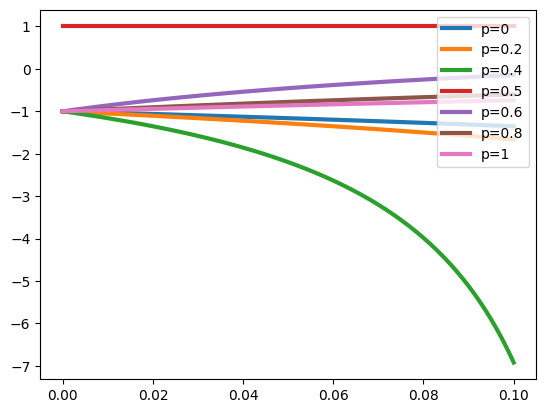

In [7]:
select_p_vals = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]

epsilons = np.linspace(0.000001, 0.1, 100)
for p in select_p_vals:
    plt.plot(epsilons, L_div_R(epsilons, p=p), label=f"{p=:}", linewidth=3)
plt.legend(loc="upper right")

All p values converge to a ratio of $-1$ except when $p = 0.5$, where $\lim_{\epsilon \rightarrow 0} \frac{a(\epsilon)}{b(\epsilon)} = \frac{2 - 4p}{4p - 2}$ doesn't exist.

## Prove $d(p, q - \epsilon) \le d(p, q) - d(q - \epsilon, q) \le d(p, q) - 2 \epsilon^2$ for $p \le q - \epsilon \le q$.

To prove the first inequality, let

\begin{align*}
h(p) 
&= d(p, q - \epsilon) - d(p, q)  \\
&= p \ln \frac{p}{q - \epsilon} + (1 - p) \ln \frac{1 - p}{1 - q + \epsilon} - p\ln \frac{p}{q} - (1 - p) \ln \frac{1- p}{1 - q} \\
&= p \ln \frac{q}{q - \epsilon} + (1 - p) \ln \frac{1 - q}{ 1 - q + \epsilon} \\
&= p \ln \frac{q(1 - q  + \epsilon)}{(q - \epsilon)(1 - q)} + \ln \frac{1 - q}{ 1 - q + \epsilon}
\end{align*}


Note, $\frac{q(1 - q  + \epsilon)}{(q - \epsilon)(1 - q)} \ge 1$, so its log is non-negative, so $h(p)$ is monotonically increasing in $p$. Therefore, given $p \le q - \epsilon$,

\begin{align*}
h(p) 
& \le h(q - \epsilon) \\
d(p, q - \epsilon) - d(p, q)
&\le d(q - \epsilon, q - \epsilon) - d(q - \epsilon, q) \\
d(p, q - \epsilon) 
&\le d(p, q) - d(q - \epsilon, q)
\end{align*}


QED.

To prove the second inequality, we apply Pinsker's inequality,

\begin{align*}
d(q - \epsilon, q) 
&\ge 2 \epsilon^2 \\
d(p, q) - d(q - \epsilon, q)
&\le d(p, q) - 2 \epsilon^2
\end{align*}


QED.